<a href="https://colab.research.google.com/github/Givari17/Forest-Fire/blob/main/finalproject_fireforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinau/Final Projects_GDSCUINJKT/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.duplicated().sum()

4

In [ ]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(513, 13)

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

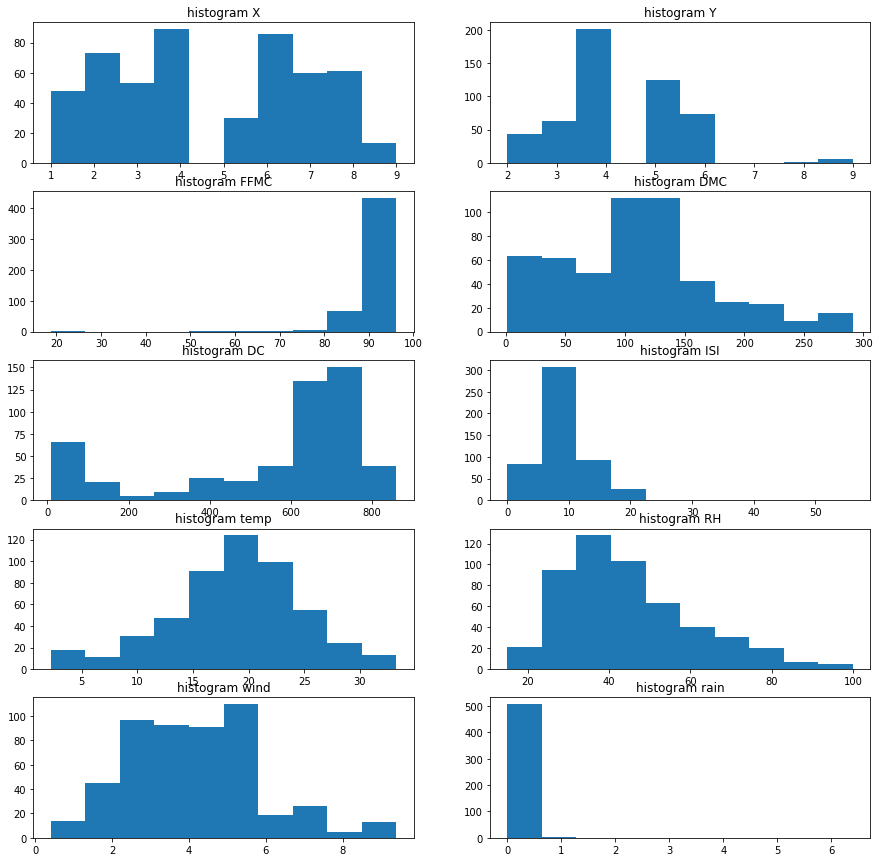

In [ ]:
# Define the size of the figure and the number of columns and rows
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Flatten the axs array so we can iterate over it with a single loop
axs = axs.flatten()
for i, data in enumerate(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']):
  axs[i].hist(df[data])
  axs[i].set_title('histogram {}'.format(data))


<AxesSubplot:ylabel='Frequency'>

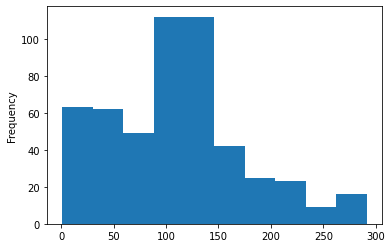

In [ ]:
df.DMC.plot(kind='hist')

# Binary Classification

<AxesSubplot:>

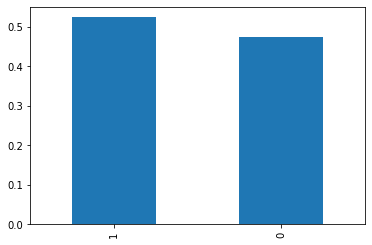

In [ ]:
## target variable diubah menjadi binary
## 1 = terjad kebakaran
## 0 = tidak terjadi kebakaran

df.area = df.area.map(lambda x:0 if x==0 else 1)
df.area.value_counts(normalize=True).plot(kind='bar')

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
#df = pd.get_dummies(df, columns=['month','day'])
df.drop(columns=['month','day','rain'], inplace=True)

In [ ]:
x = df.drop(columns='area')
y = df.area
x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)

(513, 9) (513,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
trainX, validX, trainy, validy = train_test_split(x,y,stratify=y,random_state=57,test_size=0.25)
trainX.shape, validX.shape, trainy.shape, validy.shape

((384, 9), (129, 9), (384,), (129,))

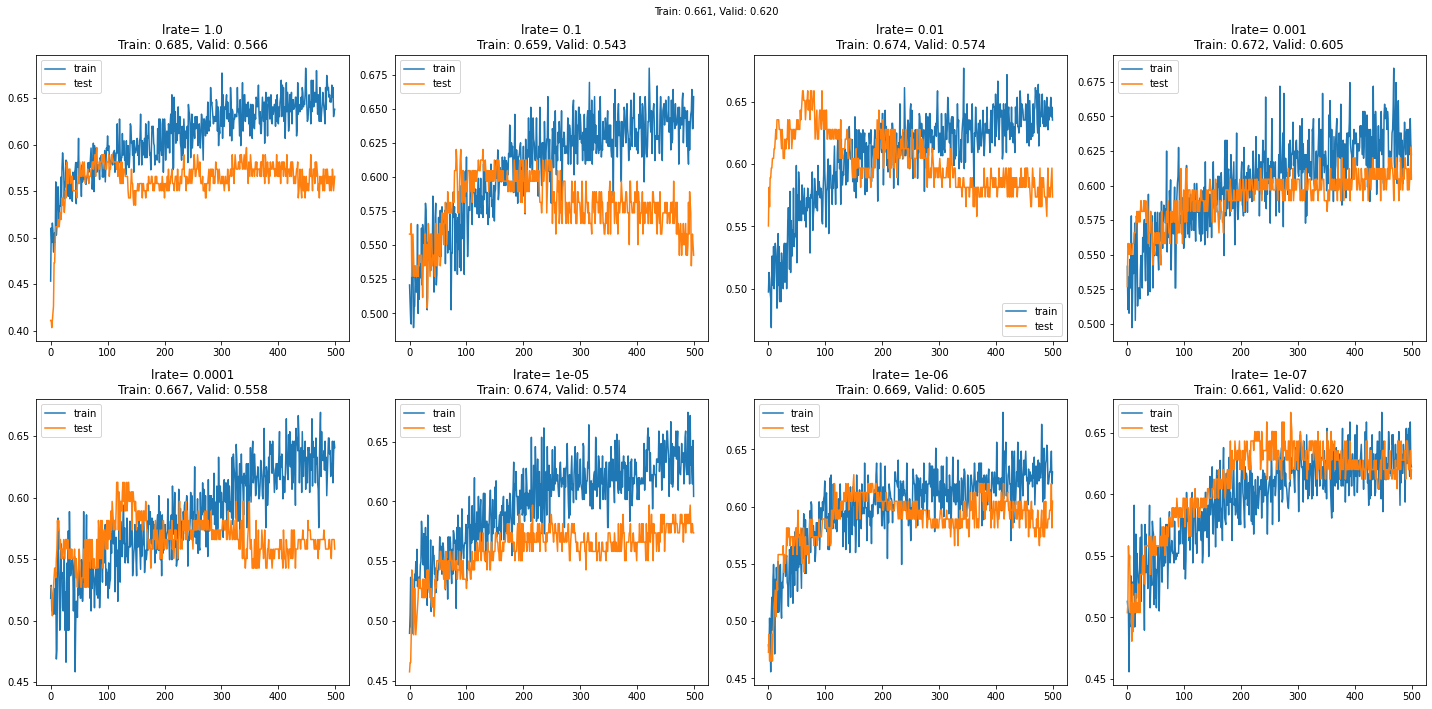

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=9, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0, batch_size=16)
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, valid_acc = model.evaluate(validX, validy, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
    plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()

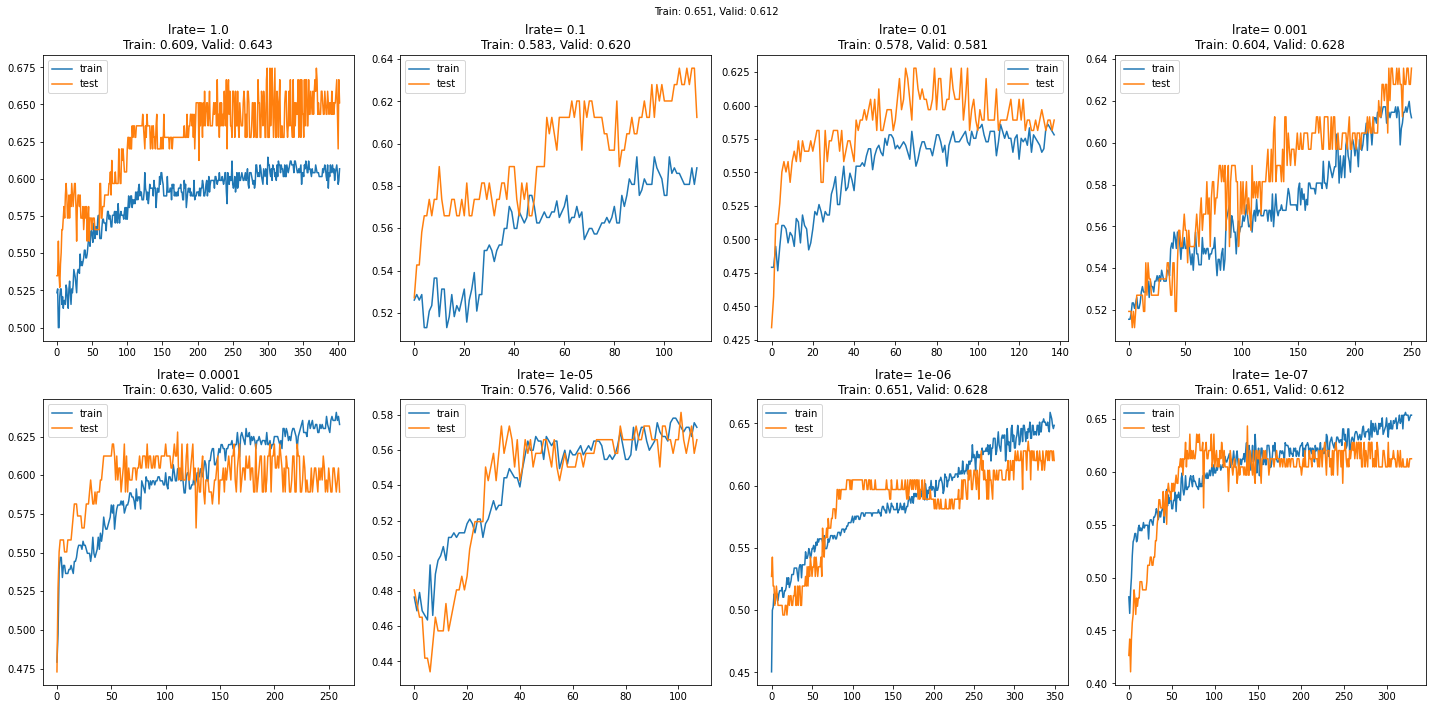

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=9, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0, batch_size=32
                        , callbacks=[early_stopping])
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, valid_acc = model.evaluate(validX, validy, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
    plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()

# Multiclass Classification

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinau/Final Projects_GDSCUINJKT/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df2 = df.copy()

<AxesSubplot:>

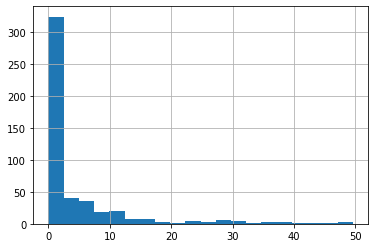

In [ ]:
df2[df2.area<50].area.hist(bins=20)

In [ ]:
df2['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [ ]:
for i in range(len(df2)):
  if df2['area'][i] <= 4:
    df2['area'][i] = 1
  elif df2['area'][i] >= 10:
    df2['area'][i] = 3
  elif df2['area'][i] == 0:
    df2['area'][i] = 0
  else:
    df2['area'][i] = 2


<ipython-input-222-281ac289db7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['area'][i] = 1
<ipython-input-222-281ac289db7a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['area'][i] = 2
<ipython-input-222-281ac289db7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['area'][i] = 3


In [ ]:
df2.drop(columns=['month','day'], inplace=True)
x = df2.drop(columns='area')
y = df2.area
x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
trainX, validX, trainy, validy = train_test_split(x,y,stratify=y,random_state=43,test_size=0.30)

## one-hot encoding
trainy_one_hot = to_categorical(trainy, num_classes=4)
validy_one_hot = to_categorical(validy, num_classes=4)
trainX.shape, validX.shape, trainy_one_hot.shape, validy_one_hot.shape

(517, 10) (517,)


((361, 10), (156, 10), (361, 4), (156, 4))

without early stoping

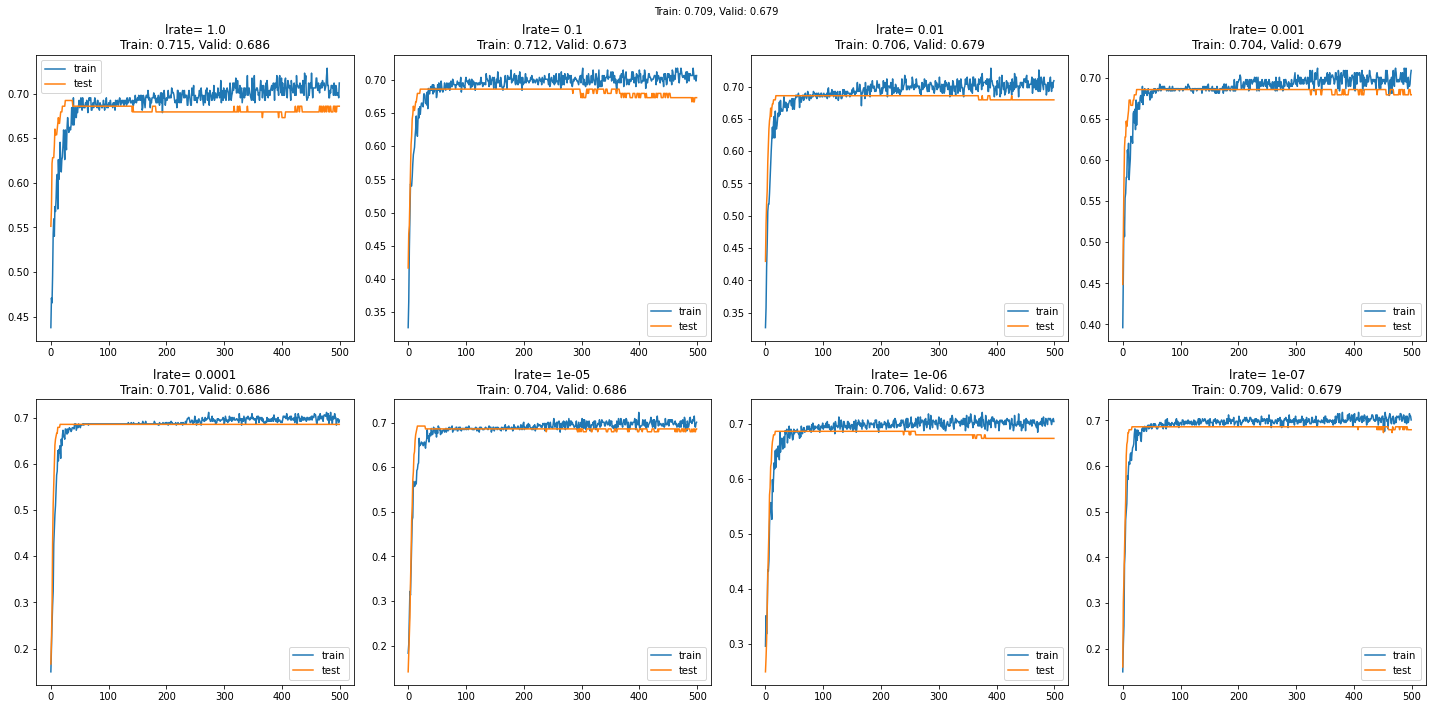

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(16, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy_one_hot, validation_data=(validX, validy_one_hot),
                        epochs=500, verbose=0, batch_size=16)
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy_one_hot, verbose=0)
    _, valid_acc = model.evaluate(validX, validy_one_hot, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
    plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy_one_hot, validX, validy_one_hot, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()

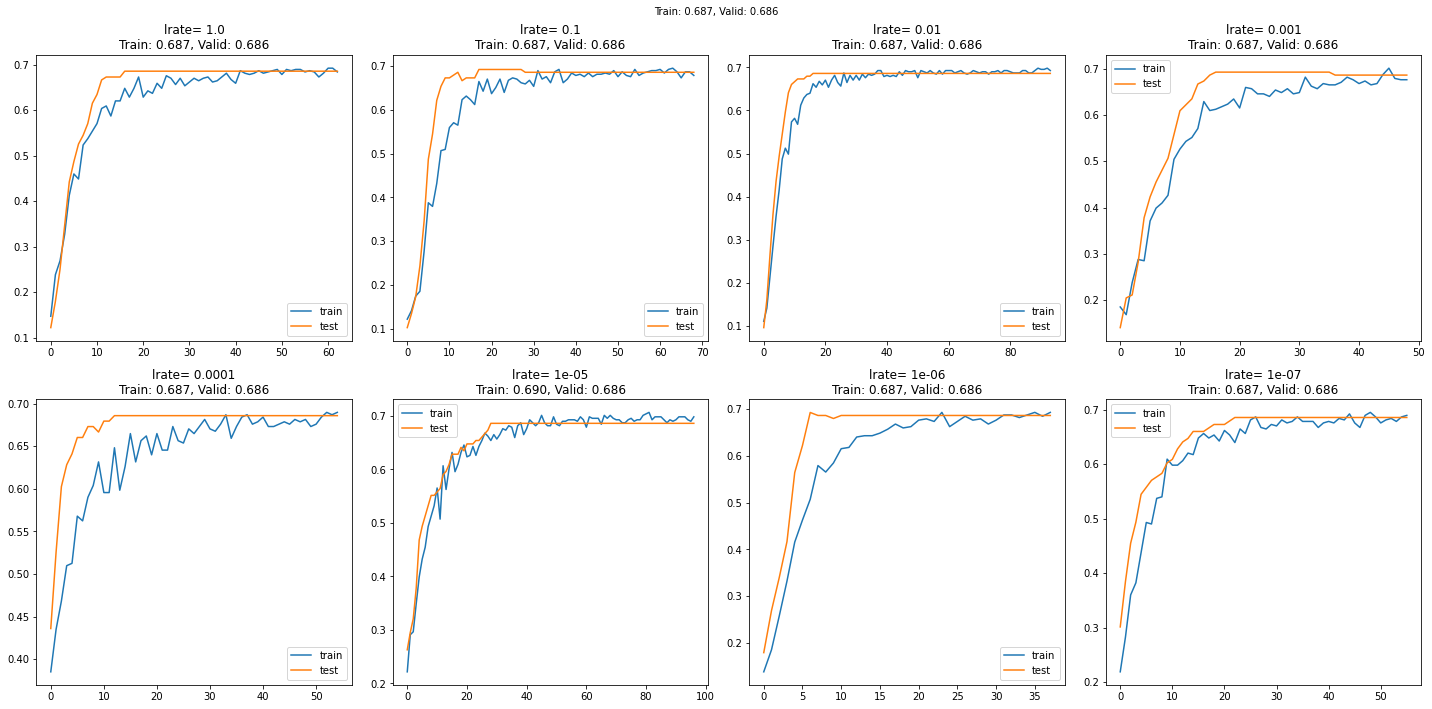

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(16, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
    
    # fit model
    history = model.fit(trainX, trainy_one_hot, validation_data=(validX, validy_one_hot),
                        epochs=500, verbose=0, batch_size=16, callbacks=[early_stopping])
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy_one_hot, verbose=0)
    _, valid_acc = model.evaluate(validX, validy_one_hot, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
    plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy_one_hot, validX, validy_one_hot, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()

# Regression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinau/Final Projects_GDSCUINJKT/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.drop(columns=['month','day'], inplace=True)

In [ ]:
x = df.drop(columns='area')
y = df.area
x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)

(517, 10) (517,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
trainX, validX, trainy, validy = train_test_split(x,y,random_state=57,test_size=0.25)
trainX.shape, validX.shape, trainy.shape, validy.shape

((387, 10), (130, 10), (387,), (130,))

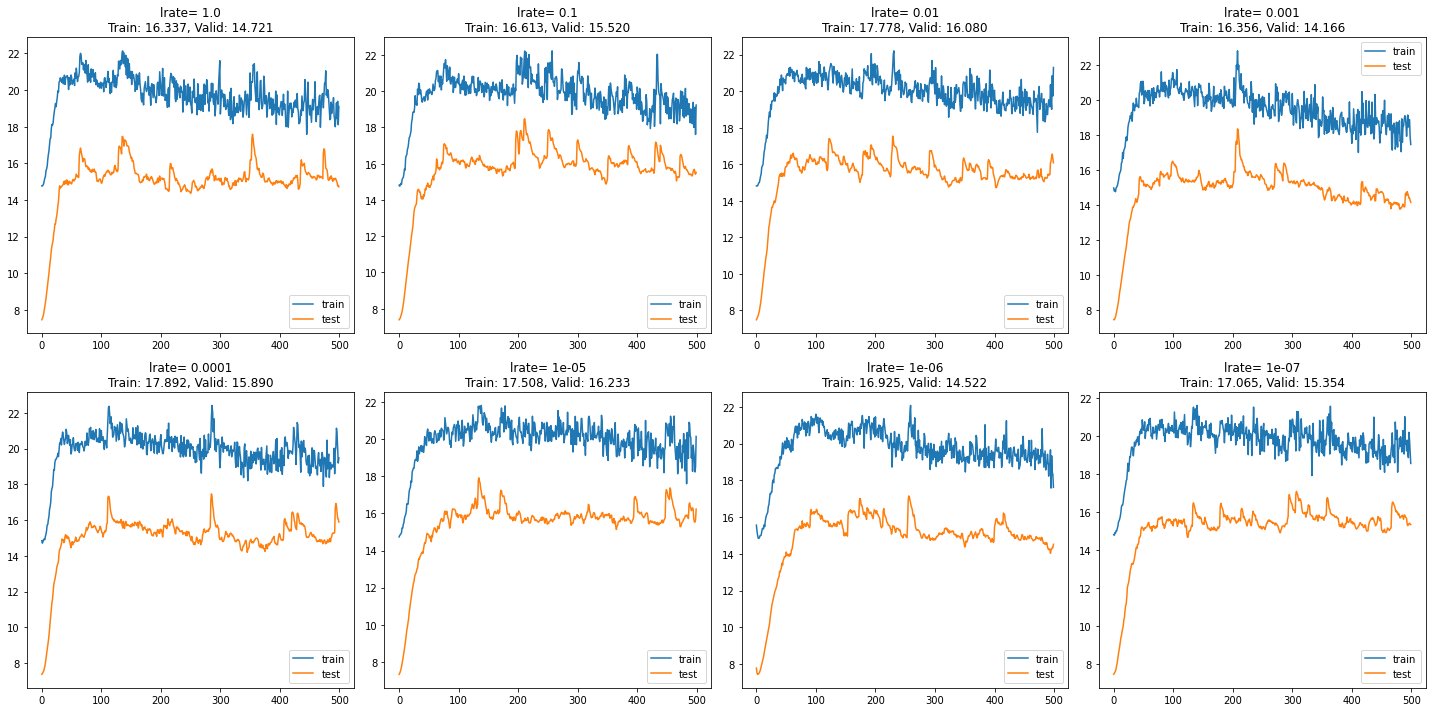

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0, batch_size=32)
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, valid_acc = model.evaluate(validX, validy, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['mae'], label='train')
    plt.plot(history.history['val_mae'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
#     plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()

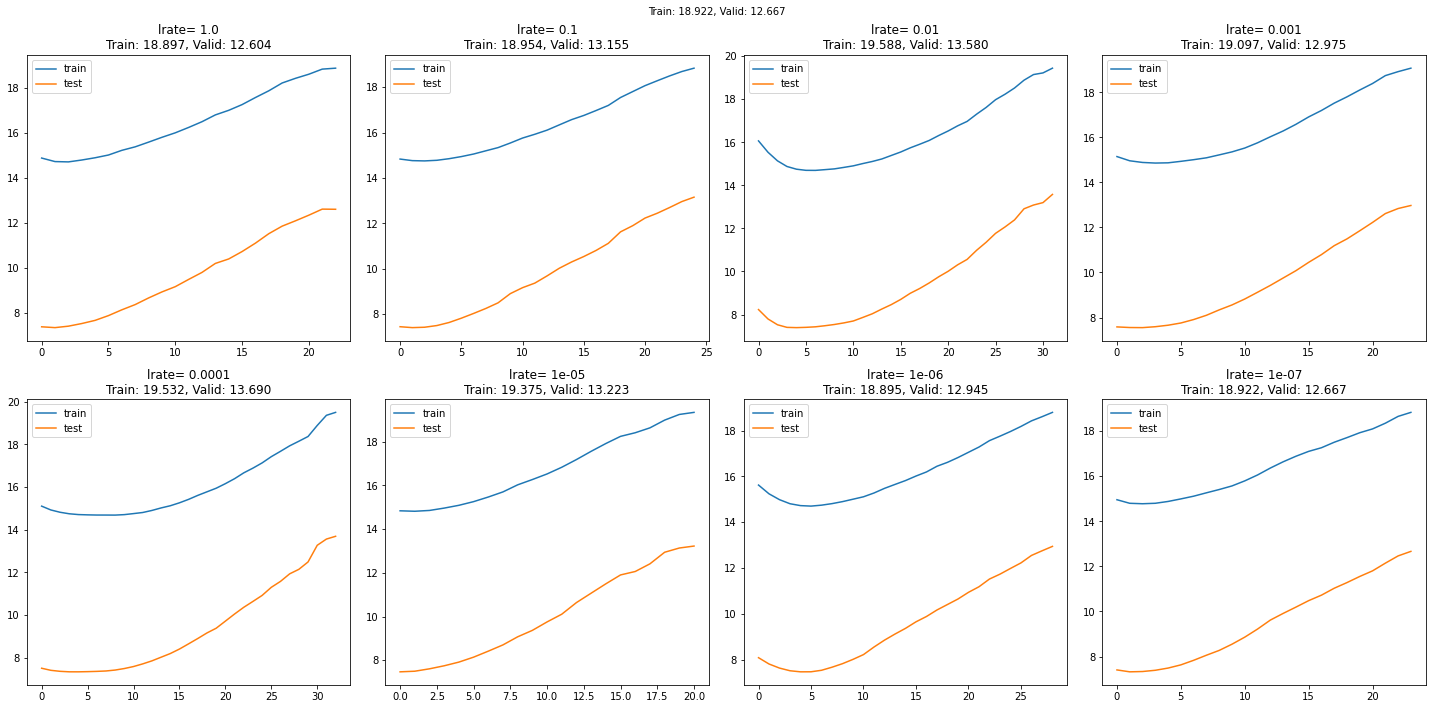

In [ ]:
def fit_model(trainX, trainy, validX, validy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0, batch_size=32,
                        callbacks=[early_stopping])
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, valid_acc = model.evaluate(validX, validy, verbose=0)
    show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
    # plot learning curves
    plt.plot(history.history['mae'], label='train')
    plt.plot(history.history['val_mae'], label='test')
    plt.title(f'lrate= {str(lrate)}\n{show_percentage}')
    plt.suptitle(show_percentage, fontsize=10, y=0.98)
    plt.legend()

# create learning curves for different batch sizes
learning_rates = [1E-0,1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6,1E-7]


fig = plt.figure(figsize=(20, 10))
gsp = fig.add_gridspec(2,4)

for i, lrate in enumerate(learning_rates):
    row = i // 4
    col = i % 4
    # determine the plot number
    ax = fig.add_subplot(gsp[row,col])
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, lrate)
    # ax.set_title(f'lrate={lrate}')

plt.tight_layout()
# show learning curves
plt.show()